<a href="https://colab.research.google.com/github/Harshitaa63/myprojects/blob/main/CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install opencv-python-headless numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Saving download.jpg to download.jpg


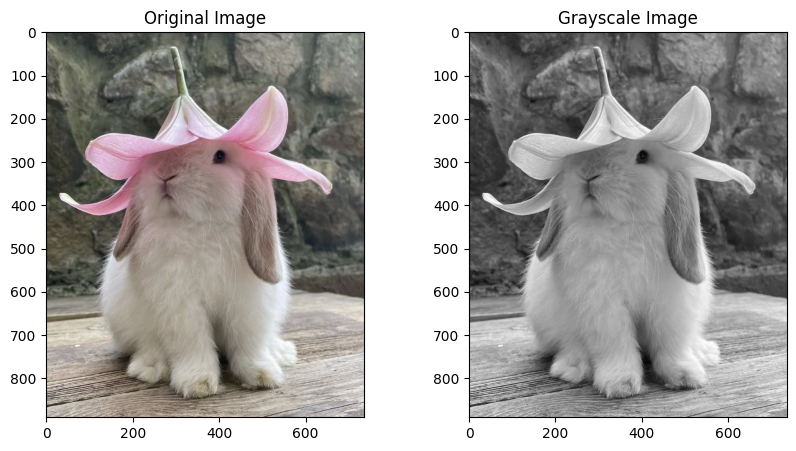

In [ ]:
# Upload image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image')
plt.show()

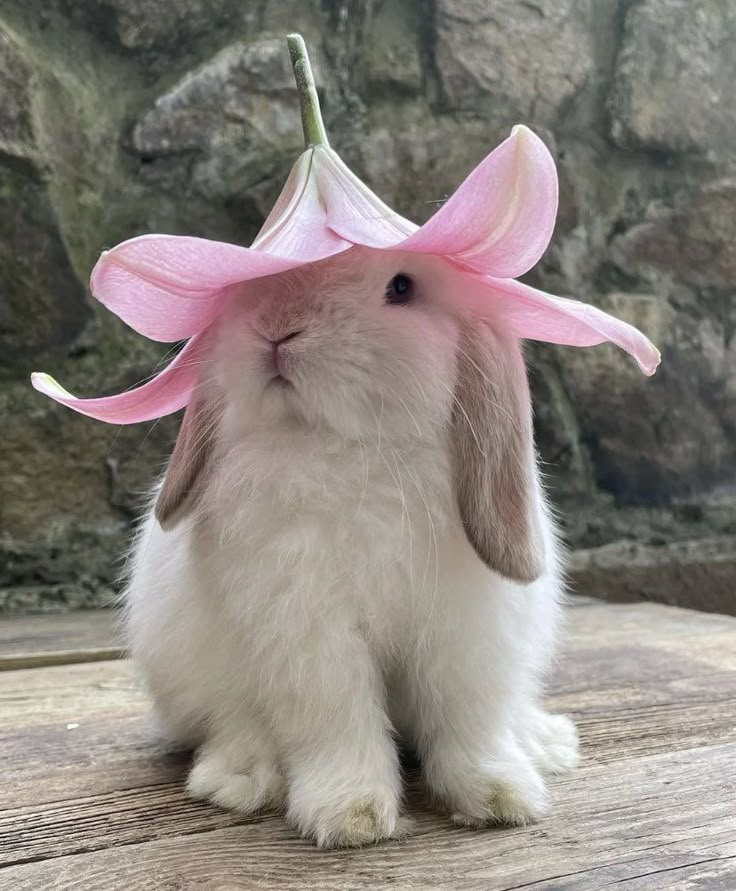

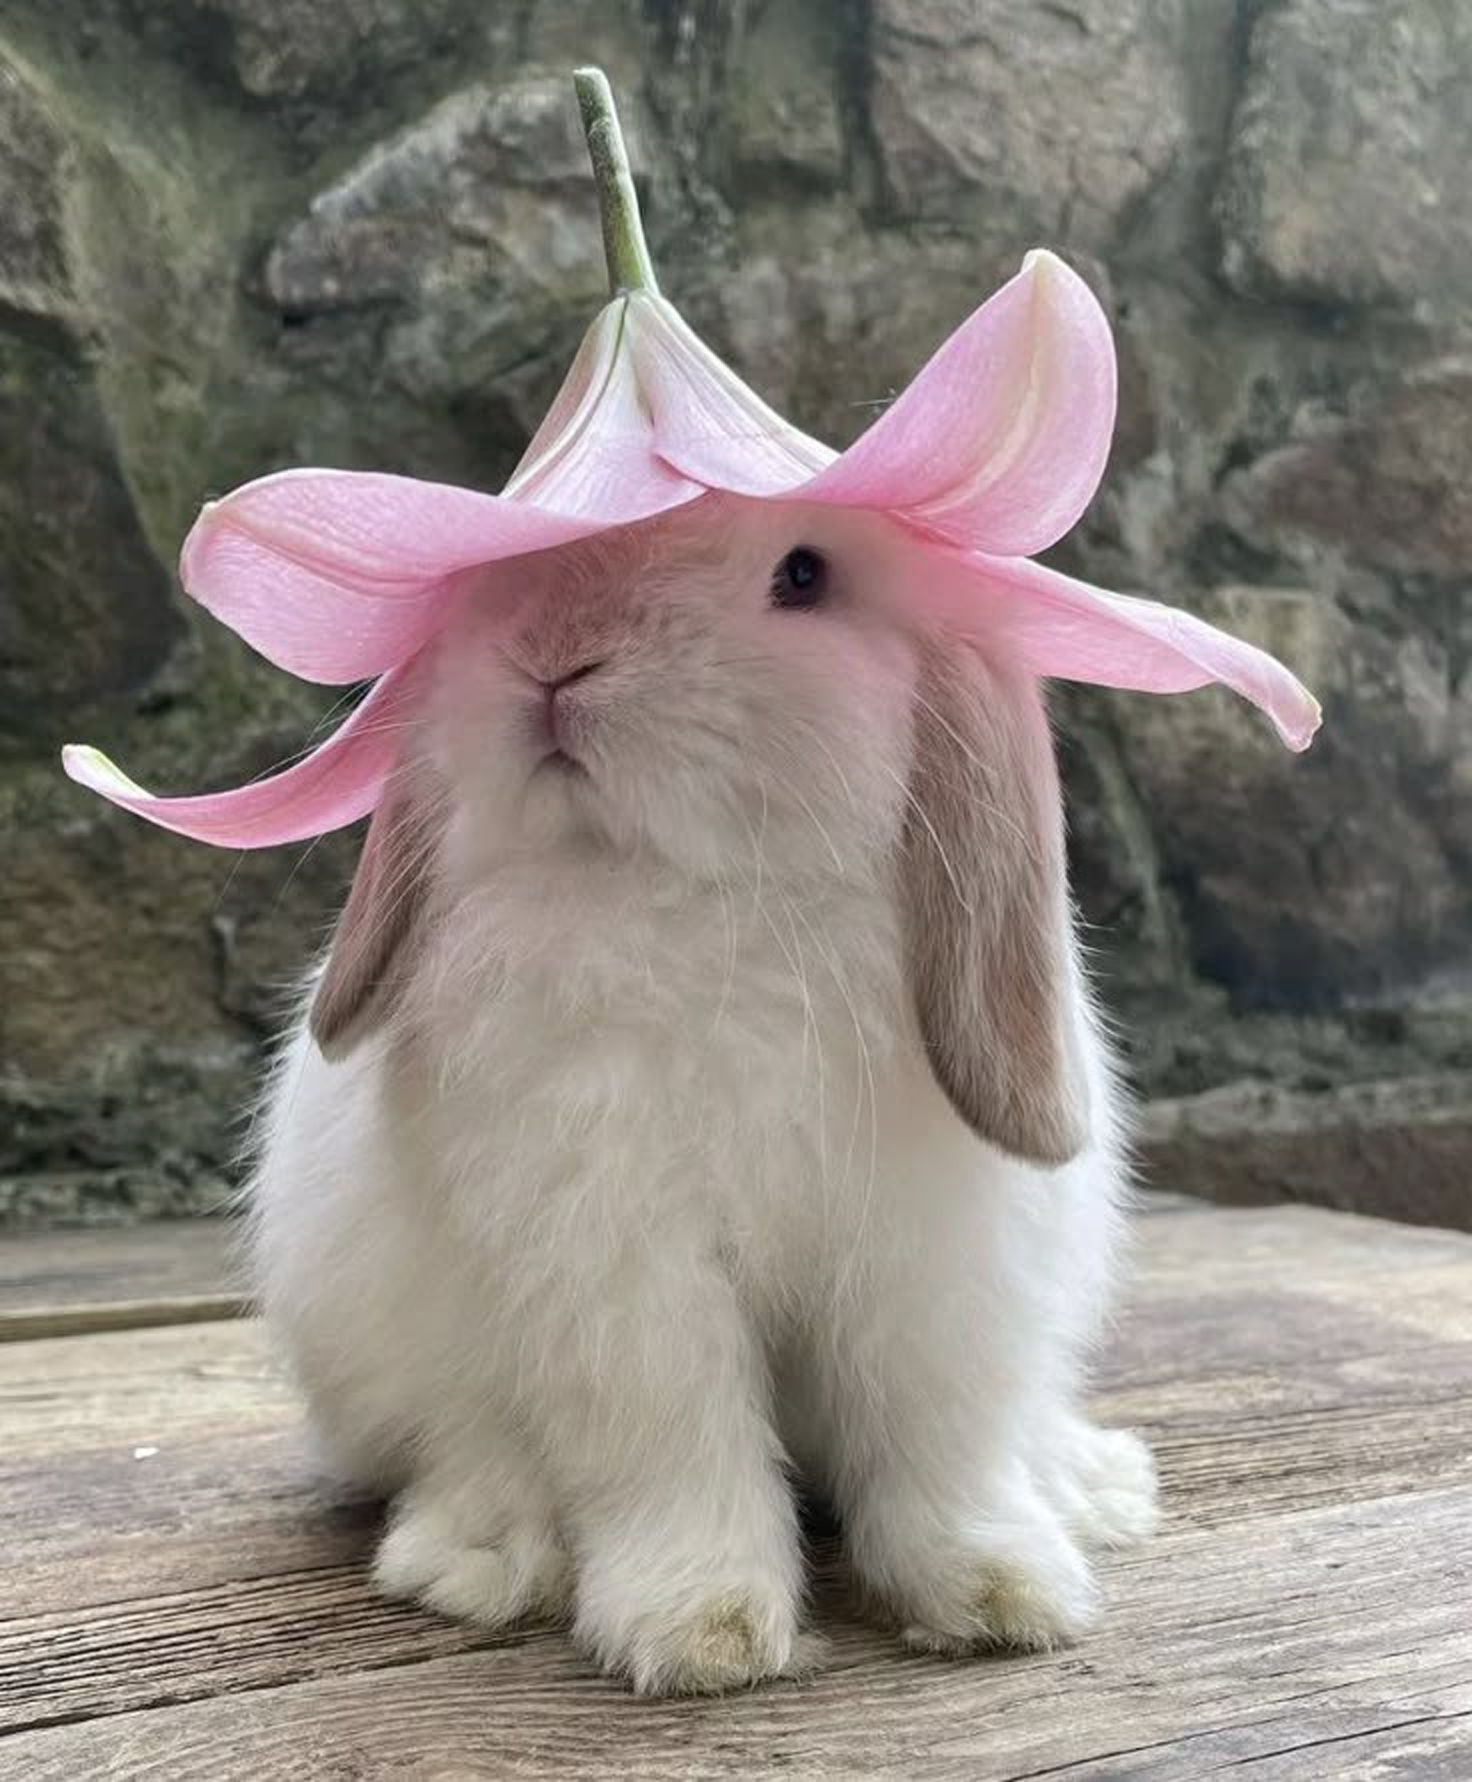

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('/content/download.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"


res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
from google.colab.patches import cv2_imshow
cv2_imshow(img)
# showing the resized image
cv2_imshow(res)
cv.waitKey(0)
cv.destroyAllWindows()

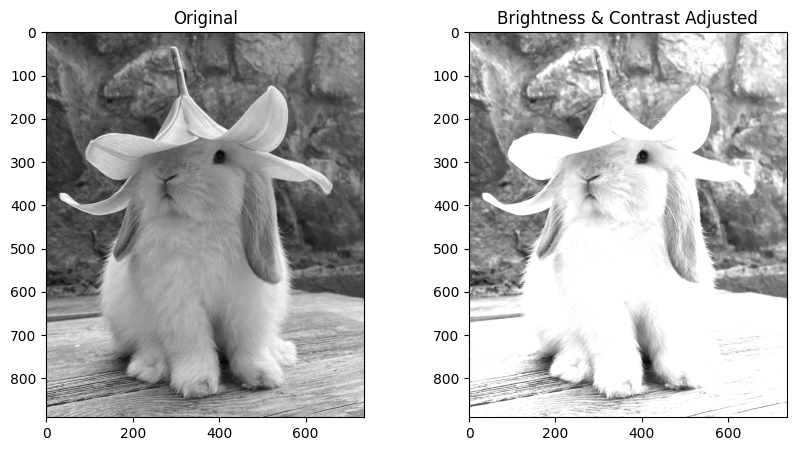

In [ ]:
def adjust_brightness_contrast(img, alpha=1.5, beta=30):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

bright_img = adjust_brightness_contrast(gray)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(bright_img, cmap='gray'), plt.title('Brightness & Contrast Adjusted')
plt.show()

In [ ]:
# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask= mask)

from google.colab.patches import cv2_imshow

cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(res)

# These cv.waitKey and cv.destroyAllWindows are typically used for interactive
# display windows which are not the standard for Colab's cv2_imshow.
# They are commented out as they won't function as expected in this environment.
 k = cv.waitKey(0) & 0xFF
 if k == 27:
#     pass # Or break, depending on the context
cv.destroyAllWindows()

IndentationError: unexpected indent (<ipython-input-36-73229d727b5f>, line 23)

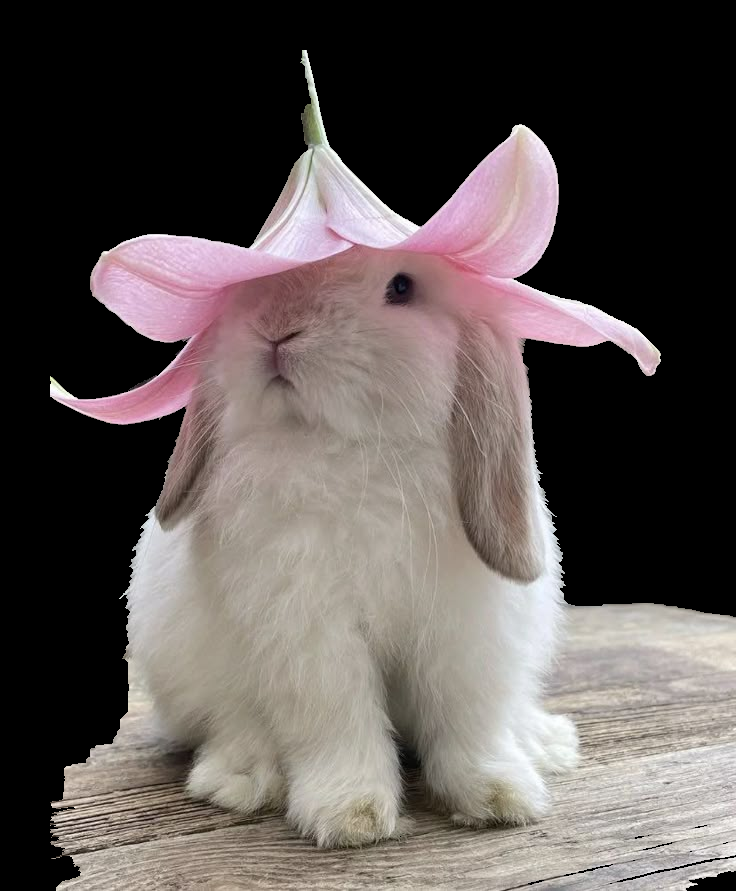

In [ ]:
import numpy as np
import cv2 as cv

# Load image
img = cv.imread('/content/download.jpg')
assert img is not None, "Error: File not found."

# Create a mask for segmentation
mask = np.zeros(img.shape[:2], np.uint8)

# Background and foreground models (used by GrabCut)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a region around the object for GrabCut
rect = (50, 50, img.shape[1] - 50, img.shape[0] - 50)

# Apply GrabCut algorithm
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Process mask to extract only the foreground
mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
img_no_bg = img * mask_final[:, :, np.newaxis]

# Display result in Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img_no_bg)  # Final image with background removed

cv.waitKey(0)
cv.destroyAllWindows()